# Predicting Yelp review Sentiment from Text

## 1. Introduction

Online review platforms, such as Yelp, provide a rich source of user text that reflects customer experiences, opinions, and satisfaction. Understanding how sentiment is expressed in these reviews is important for both businesses and researchers who are interested in behavioral patterns, text modeling, and bias when looking at observational data. 

In this project, we analyzed a subset of Yelp reviews to explore: 

- How star ratings are distributed across reviews
- Whether review length varies systematically with rating
- Which linguistic features distinguish positive and negative sentiment
- How well a simple, interpretable text model can predict sentiment

Our analysis emphasizes reproducibility, interpretability, and transparent modeling choices, which follow the principles of modern data science workflows. 

## 2. Project Structure & Reproducibility

This repoitory is organized to clearly separate computation from communication: 

- Data ingestion, preprocessing, and modeling are performed in modular notebooks and reusable utility functions
- This notebook (main.ipynb) serves as the primary narrative
- All figures and tables are loaded from the outputs/ directory

This design ensures:
- Reproducibility without rerunning expensive computations
- Clear separation of exploratory analysis and presentation
- Deterministic results for graders and collaborators

All dependencies are specified in environment.yml and results can be regenrated using the provided Makefile.

## 3. Data Overview

We analyzed a curated subset of the Yelp Open Dataset consisting of restaurant reviews. Due to the size of the full dataset, we work with a manageable subset constructed through reproducible filtering and sampling.

Each observation corresponds to a single user review and contains: 

- review: free-text review content
- stars: integer star rating from 1 to 5
- sentiment labels used for binary classification

Reviews with higher star ratings are labeled as positive, while lower-rated reviews are labeled as negative. As is typical for online review platforms, the dataset exhibits a strong skew toward positive reviews.

All preprocessing and feature extraction steps are performed outside of this notebook to maintain modularity and reproducibility.

## 4. Distribution of Star Ratings

We begin by examining the distribution of star ratings to understand structural properties of the dataset.

(-0.5, 1439.5, 940.5, -0.5)

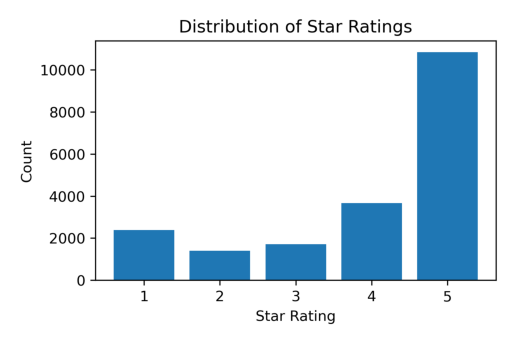

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("outputs/distribution_of_star_ratings.png")
plt.imshow(img)
plt.axis("off")

**Key Observations:** 

- 5-star reviews dominate the dataset, making up the clear majority of all observations
- 4-star reviews are the second most common, but are substantially fewer than 5-star reviews
- Low ratings (1-2 stars) occur relatively infrequently compared to higher ratings

This distribution indicates a strong skew toward highly positive ratings, a common pattern in online review platforms. Users are substantially more likely to leave reviews following very positive experiences, while neutral or mildly negative experiences are underrepresented. 

This imbalance has important implications for downstream modeling. Naive classifiers may achieve high accuracy by favoring the majority class. This motivates the use of careful interpretation of performance results.

## 5. Review Length and Star Ratings

We next examine whether the number of words in a review varies systematically with star ratings. 

(-0.5, 1786.5, 1327.5, -0.5)

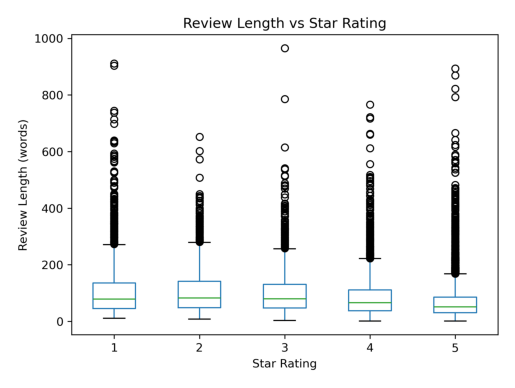

In [3]:
img = Image.open("outputs/review_length_vs_star_rating.png")
plt.imshow(img)
plt.axis("off")

Across rating categories, median review length decreases slightly as star ratings increase, with lower-rated reviews tending to be longer on average. Lower star ratings show greater variability in review length, including more extreme long reviews. Higher rated reviews are generally shorter and more tightly distributed. 

To quantify this relationship, we compute the Spearman rank correlation between star ratings and review length: 

- Spearman ρ ≈ 0.10
- p-value < 0.001

Although statistically significant, the effect size is small, which indicates that review length alone provides limited explanatory power for sentiment.

## 6. Distribution of Review Lengths

To better understand the textual input, we examine the overall distribution of review lengths. 

(-0.5, 1773.5, 1356.5, -0.5)

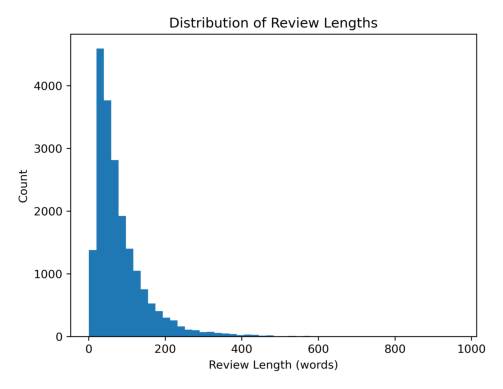

In [5]:
img = Image.open("outputs/distribution_of_review_lengths.png")
plt.imshow(img)
plt.axis("off")

**Key Observations**

- Review lengths are highly right-skewed, with most reviews containing relatively few words
- The majority of reviews are short (well under 200 words), while a small number extend to several hundred words or more
- Extremely long reviews are rare but create a long right tail in the distribution
- This heavy-tailed structure indicates substantial variability in how much detail users provide

This distribution suggests that while detailed reviews exist, most users express their opinions concisely. The strong skew and sparsity in review length motivate the use of TF–IDF representations, which are well-suited for handling uneven document lengths and high-dimensional text data.

## 7. Sentiment Classification Model

We train a sentiment classifier using review text as the sole input. The modeling pipeline consists of:

- TF–IDF vectorization of review text

- A logistic regression classifier

- Stratified train, validation, and test splits

- Hyperparameter tuning using validation ROC–AUC

Logistic regression is chosen for its balance between performance and interpretability. The tuned model achieves strong performance on held-out data, as measured by both accuracy and ROC–AUC.

While overall performance is high, errors are not symmetric across classes. Positive reviews are generally easier to classify, while negative reviews are more challenging due to class imbalance and greater linguistic variability. For this reason, ROC–AUC is emphasized alongside accuracy.

## 8. Confusion Matrix

To better understand model performance beyond aggregate metrics, we examine the confusion matrix on the held-out test set.

(-0.5, 1193.5, 1129.5, -0.5)

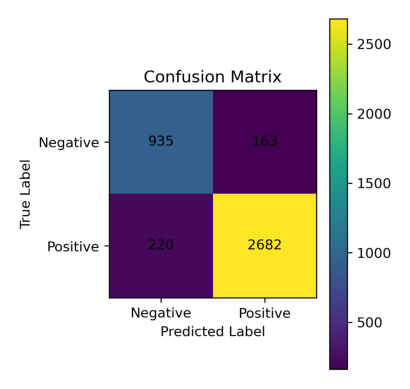

In [7]:
img = Image.open("outputs/confusion_matrix.png")
plt.imshow(img)
plt.axis("off")


**Key Observations**

- The model correctly classifies 2,682 positive reviews and 935 negative reviews, indicating strong overall performance
- False positives (163) occur when negative reviews are incorrectly predicted as positive
- False negatives (220) occur when positive reviews are incorrectly predicted as negative
- Misclassifications are more common for the negative class, reflecting both class imbalance and greater linguistic variability in negative reviews

Overall, the model is substantially better at identifying positive sentiment than negative sentiment. This asymmetry highlights the importance of examining class-specific errors rather than relying solely on aggregate accuracy metrics.

## 9. Model Interpretability: Important Words and Phrases

A key advantage of linear models is interpretability. We examine the strongest coefficients in the trained classifier. 

**Top Positive Indicators**

(-0.5, 3568.5, 1169.5, -0.5)

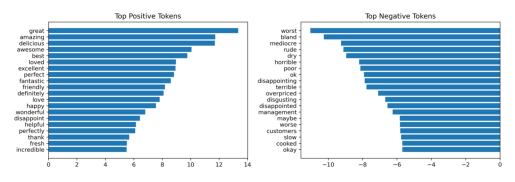

In [8]:
img = Image.open("outputs/top_positive_negative_tokens.png")
plt.imshow(img)
plt.axis("off")


Positive sentiment is associated with strongly evaluative terms such as great, amazing, and delicious. Negative sentiment is driven by words such as worst, bland, and mediocre. Some tokens appear counterintuitive in isolation, reflecting the limitations of bag-of-words representations and the role of context.

## 10. Limitations and Future Work

This analysis demonstrates that:

- Yelp reviews exhibit strong positivity bias
- Review length provides limited standalone predictive power
- Simple, interpretable text models can perform competitively when evaluated appropriately

Future work could explore:
- Contextual embeddings (e.g., transformer-based models)
- Aspect-based sentiment analysis
- Cross-domain generalization across business categories

Overall, this project illustrates how classical text modeling approaches remain valuable tools when combined with careful evaluation, interpretability, and reproducible workflows.

## Author Contributions

## Bibliography

@misc{yelp_dataset,
  title        = {Yelp Open Dataset},
  author       = {{Yelp Inc.}},
  year         = {2021},
  howpublished = {\url{https://www.yelp.com/dataset}},
  note         = {Accessed via Kaggle}
}